# 第一节 平均发展速度

## 实验7-1 基于几何法的平均发展速度

1996-2002年AWAGE如下，试用几何平均法计算这期间的平均发展速度

In [1]:
import numpy as np
import pandas as pd 

In [3]:
awage_df = pd.read_excel('7-1.xlsx')
awage_df

,Year,AWAGE
0,1996,6210
1,1997,6470
2,1998,7479
3,1999,8346
4,2000,9371
5,2001,10870
6,2002,12422


In [13]:
Xg = np.power(awage_df.loc[6,'AWAGE'] / awage_df.loc[0,'AWAGE'] , 1/(len(awage_df - 1)))
Xg

1.1041149108057335

结论 平均发展速度为112.25%

## 实验7-2 基于方程式法的平均发展速度

In [5]:
from scipy.optimize import fsolve , minimize

In [7]:
# fsolve方法
y = awage_df.loc[1:,'AWAGE'].sum() / awage_df.loc[0,'AWAGE']

result = fsolve(lambda x: x[0] + x[0]**2 + x[0]**3 + x[0]**4 + x[0]**5 + x[0]**6 - y , (1.05,))

result

array([1.11220723])

In [9]:
# minimize方法
cons = ({'type':'eq','fun':lambda x: x[0] + x[0]**2 + x[0]**3 + x[0]**4 + x[0]**5 + x[0]**6 - y})
fun = lambda x:x[0]
result = minimize(fun , (1.05,),method='SLSQP', constraints=cons)

result.x

array([1.11220723])

# 第二节 长期趋势的测定

## 实验7-3 移动平均测定长期趋势

根据过去12个月的销量，用移动平均法对其下一时期进行预测。

In [15]:
sell_df = pd.read_excel('7-3.xlsx')
sell_df

,Month,Q
0,1,435149
1,2,372658
2,3,370422
3,4,378568
4,5,351045
5,6,388963
6,7,405176
7,8,357536
8,9,439776
9,10,344008


In [18]:
# 利用pandas中rolling方法计算移动平均值，当平均的项数是奇数时
sell_df.loc[:,'AVG3'] = sell_df.loc[:,'Q'].rolling(window=3,center=True).mean()
sell_df

,Month,Q,AVG3
0,1,435149,NaN
1,2,372658,392743.000000
2,3,370422,373882.666667
3,4,378568,366678.333333
4,5,351045,372858.666667
5,6,388963,381728.000000
6,7,405176,383891.666667
7,8,357536,400829.333333
8,9,439776,380440.000000
9,10,344008,384623.333333


In [19]:
# 当平均的项数是偶数时，需要用两次
sell_df.loc[:,'AVG4'] = sell_df.loc[:,'Q'].rolling(window=4,center=True).mean().rolling(window=2,center=True).mean()
sell_df

,Month,Q,AVG3,AVG4
0,1,435149,NaN,NaN
1,2,372658,392743.000000,NaN
2,3,370422,373882.666667,NaN
3,4,378568,366678.333333,378686.250
4,5,351045,372858.666667,370211.375
5,6,388963,381728.000000,376593.750
6,7,405176,383891.666667,378309.000
7,8,357536,400829.333333,386771.375
8,9,439776,380440.000000,392243.375
9,10,344008,384623.333333,382237.750


## 实验7-4 趋势模型法测定长期趋势

1989-2003年出口总额，试测定其长期趋势（要求用二次曲线方程测定长期趋势）

In [20]:
export_df = pd.read_excel('7-4 .xlsx')
export_df 

,Year,Amount
0,1989,525.38
1,1990,620.91
2,1991,719.10
3,1992,849.40
4,1993,917.44
5,1994,1210.06
6,1995,1487.80
7,1996,1510.48
8,1997,1827.92
9,1998,1837.09


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.rcParams['savefig.dpi'] = 100 # 图片质量

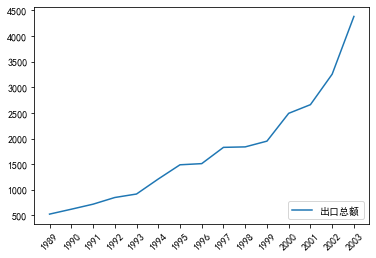

In [22]:
x = export_df['Year']
y = export_df['Amount']
plt.plot(x,y,'-',label='出口总额')
plt.xticks(x,rotation = 45)
plt.legend(loc='lower right')

In [23]:
# 利用numpy拟合二次曲线
params = np.polyfit(x , y , deg=2)
params

array([ 1.68191653e+01, -6.69143283e+04,  6.65546113e+07])

In [24]:
# 利用numpy求出口总额的估计值，并计算R方

_y = np.polyval(params , x)
_y

array([ 665.46626473,  674.59679413,  717.36565417,  793.77284485,
        903.81836617, 1047.50221813, 1224.82440074, 1435.78491398,
       1680.38375787, 1958.6209324 , 2270.49643757, 2616.0102734 ,
       2995.16243985, 3407.95293695, 3854.3817647 ])

In [26]:
r2 = np.sum((_y - np.mean(y))**2) / np.sum((y-np.mean(y))**2)
r2

0.9575667909239387

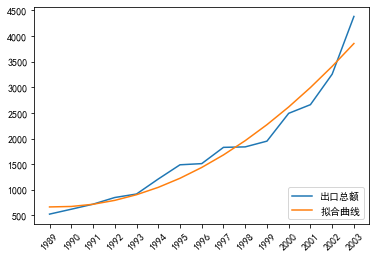

In [27]:
# 画出拟合曲线
plt.plot(x,y,'-',label='出口总额')
plt.plot(x,_y,label='拟合曲线')
plt.xticks(x,rotation = 45)
plt.legend(loc='lower right')

In [28]:
# 上述二次曲线的拟合方程也可以用回归方法求得
import statsmodels.formula.api as smf

In [31]:
export_df.loc[:,'YearSquare'] = export_df.loc[:,'Year']**2
export_df

,Year,Amount,YearSquare
0,1989,525.38,3956121
1,1990,620.91,3960100
2,1991,719.10,3964081
3,1992,849.40,3968064
4,1993,917.44,3972049
5,1994,1210.06,3976036
6,1995,1487.80,3980025
7,1996,1510.48,3984016
8,1997,1827.92,3988009
9,1998,1837.09,3992004


In [32]:
export_model = smf.ols(formula='Amount ~ YearSquare + Year' , data=export_df)
export_result = export_model.fit()
export_result.params

Intercept     6.655461e+07
YearSquare    1.681917e+01
Year         -6.691433e+04
dtype: float64

In [33]:
export_result.rsquared

0.9575667909383319

# 第三节 季节变动与循环变动的测定

## 实验7-5 季节变动的测定

某公司近五年各季度销售额如下。用移动平均趋势剔除法计算各季度的季节指数。

In [2]:
season_df = pd.read_excel('7-5.xlsx')
season_df

,Year,Season,Y
0,1,1,29
1,1,2,90
2,1,3,108
3,1,4,14
4,2,1,35
5,2,2,112
6,2,3,130
7,2,4,24
8,3,1,40
9,3,2,108


In [7]:
# 计算中心化四季移动平均值M
mean_fun = lambda x:(0.5 * x[0] + x[1] + x[2] + x[3] + 0.5*x[4] ) / 4
season_df.loc[:,'M'] = season_df.loc[:,'Y'].rolling(window=5,center=True).apply(mean_fun)
season_df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,Year,Season,Y,M
0,1,1,29,NaN
1,1,2,90,NaN
2,1,3,108,61.000
3,1,4,14,64.500
4,2,1,35,70.000
5,2,2,112,74.000
6,2,3,130,75.875
7,2,4,24,76.000
8,3,1,40,75.000
9,3,2,108,75.000


In [11]:
# 计算趋势剔除值(Y/M)
season_df.loc[:,'Y/M'] = season_df.apply(lambda x:x['Y']/x['M'] , axis=1)
season_df

,Year,Season,Y,M,Y/M
0,1,1,29,NaN,NaN
1,1,2,90,NaN,NaN
2,1,3,108,61.000,1.770492
3,1,4,14,64.500,0.217054
4,2,1,35,70.000,0.500000
5,2,2,112,74.000,1.513514
6,2,3,130,75.875,1.713344
7,2,4,24,76.000,0.315789
8,3,1,40,75.000,0.533333
9,3,2,108,75.000,1.440000


In [12]:
# 计算季节指数
# 计算每年同季度的Y/M平均值，为方便表示，称之为未调整的季节指数
unadjusted_S = season_df.groupby('Season')['Y/M'].mean()
unadjusted_S

Season
1    0.520247
2    1.439176
3    1.726892
4    0.299039
Name: Y/M, dtype: float64

In [13]:
# 对未调整的季节指数进行调整得到四个季度的季节指数S
S = unadjusted_S / unadjusted_S.sum() * 4
S.name = 'S'
S

Season
1    0.522159
2    1.444465
3    1.733238
4    0.300138
Name: S, dtype: float64

## 实验7-6 循环变动的测定

In [14]:
S_df = S.to_frame().reset_index()
season_df = season_df.merge(S_df , how='left' , on=['Season'])
season_df

,Year,Season,Y,M,Y/M,S
0,1,1,29,NaN,NaN,0.522159
1,1,2,90,NaN,NaN,1.444465
2,1,3,108,61.000,1.770492,1.733238
3,1,4,14,64.500,0.217054,0.300138
4,2,1,35,70.000,0.500000,0.522159
5,2,2,112,74.000,1.513514,1.444465
6,2,3,130,75.875,1.713344,1.733238
7,2,4,24,76.000,0.315789,0.300138
8,3,1,40,75.000,0.533333,0.522159
9,3,2,108,75.000,1.440000,1.444465


In [15]:
# 计算分离季节变动后的销售预测序列TCI = Y/S
season_df.loc[:,'TCI'] = season_df.apply(lambda x: x['Y'] / x['S'] , axis=1)
season_df

,Year,Season,Y,M,Y/M,S,TCI
0,1,1,29,NaN,NaN,0.522159,55.538673
1,1,2,90,NaN,NaN,1.444465,62.306807
2,1,3,108,61.000,1.770492,1.733238,62.311102
3,1,4,14,64.500,0.217054,0.300138,46.645228
4,2,1,35,70.000,0.500000,0.522159,67.029433
5,2,2,112,74.000,1.513514,1.444465,77.537360
6,2,3,130,75.875,1.713344,1.733238,75.004105
7,2,4,24,76.000,0.315789,0.300138,79.963248
8,3,1,40,75.000,0.533333,0.522159,76.605066
9,3,2,108,75.000,1.440000,1.444465,74.768169


In [16]:
# 计算分离季节变动后的销售序列TCI的长期趋势T

t = season_df.index + 1
TCI = season_df.loc[:,'TCI']
params = np.polyfit(t , TCI , deg = 1)
params

array([ 3.29030694, 49.69880186])

In [17]:
# 估计长期趋势T
season_df.loc[:,'T'] = np.polyval(params,t)
season_df

,Year,Season,Y,M,Y/M,S,TCI,T
0,1,1,29,NaN,NaN,0.522159,55.538673,52.989109
1,1,2,90,NaN,NaN,1.444465,62.306807,56.279416
2,1,3,108,61.000,1.770492,1.733238,62.311102,59.569723
3,1,4,14,64.500,0.217054,0.300138,46.645228,62.860030
4,2,1,35,70.000,0.500000,0.522159,67.029433,66.150337
5,2,2,112,74.000,1.513514,1.444465,77.537360,69.440644
6,2,3,130,75.875,1.713344,1.733238,75.004105,72.730950
7,2,4,24,76.000,0.315789,0.300138,79.963248,76.021257
8,3,1,40,75.000,0.533333,0.522159,76.605066,79.311564
9,3,2,108,75.000,1.440000,1.444465,74.768169,82.601871


In [21]:
# 剔除长期趋势，CI = TCI/T
season_df.loc[:,'CI'] = season_df.apply(lambda x :x['TCI'] / x['T'] , axis=1)

# 清除不规则变动，得到C
season_df.loc[:,'C'] = season_df.loc[:,'CI'].rolling(window=3,center=True).mean()

# 计算不规则变动，I=CI/C
season_df.loc[:,'I'] = season_df.apply(lambda x: x['CI'] / x['C'] , axis=1)

season_df

,Year,Season,Y,M,Y/M,S,TCI,T,CI,C,I
0,1,1,29,NaN,NaN,0.522159,55.538673,52.989109,1.048115,NaN,NaN
1,1,2,90,NaN,NaN,1.444465,62.306807,56.279416,1.107098,1.067077,1.037505
2,1,3,108,61.000,1.770492,1.733238,62.311102,59.569723,1.046020,0.965055,1.083896
3,1,4,14,64.500,0.217054,0.300138,46.645228,62.860030,0.742049,0.933786,0.794667
4,2,1,35,70.000,0.500000,0.522159,67.029433,66.150337,1.013289,0.957313,1.058473
5,2,2,112,74.000,1.513514,1.444465,77.537360,69.440644,1.116599,1.053714,1.059679
6,2,3,130,75.875,1.713344,1.733238,75.004105,72.730950,1.031254,1.066569,0.966889
7,2,4,24,76.000,0.315789,0.300138,79.963248,76.021257,1.051854,1.016328,1.034955
8,3,1,40,75.000,0.533333,0.522159,76.605066,79.311564,0.965875,0.974297,0.991356
9,3,2,108,75.000,1.440000,1.444465,74.768169,82.601871,0.905163,0.905802,0.999295


# 第四节 时间序列预测

## 实验7-7 时间序列模型的预测

根据数据，利用指数平滑法预测2005年和2006年的销售量

In [36]:
source_df = pd.read_excel('7-7.xlsx')
source_df

,Year,Q
0,1993,54.0
1,1994,50.0
2,1995,52.0
3,1996,67.0
4,1997,82.0
5,1998,70.0
6,1999,89.0
7,2000,88.0
8,2001,84.0
9,2002,98.0


In [37]:
alpha = 0.45
source_df.loc[:11,'E1'] = source_df.loc[:,'Q'].ewm(alpha=alpha , adjust = False).mean()
source_df.loc[:11,'E2'] = source_df.loc[:,'E1'].ewm(alpha=0.45 , adjust = False).mean()
source_df.loc[:11,'at'] = source_df.apply(lambda x: 2*x['E1'] - x['E2'] , axis=1)
source_df.loc[:11,'bt'] = source_df.apply(lambda x: alpha / (1-alpha)*(x['E1'] - x['E2']) , axis=1)

source_df

,Year,Q,E1,E2,at,bt
0,1993,54.0,54.000000,54.000000,54.000000,0.000000
1,1994,50.0,52.200000,53.190000,51.210000,-0.810000
2,1995,52.0,52.110000,52.704000,51.516000,-0.486000
3,1996,67.0,58.810500,55.451925,62.169075,2.747925
4,1997,82.0,69.245775,61.659158,76.832393,6.207233
5,1998,70.0,69.585176,65.225866,73.944487,3.566708
6,1999,89.0,78.321847,71.119057,85.524636,5.893191
7,2000,88.0,82.677016,76.320139,89.033893,5.201081
8,2001,84.0,83.272359,79.448638,87.096080,3.128499
9,2002,98.0,89.899797,84.151660,95.647935,4.703022


In [39]:
# 计算预测值y
source_df.loc[:12,'yt'] = source_df.apply(lambda x:x['at'] + x['bt'] , axis=1).shift()
source_df.loc[13,'yt'] = source_df.loc[12,'yt'] + source_df.loc[11,'bt']

source_df

,Year,Q,E1,E2,at,bt,yt
0,1993,54.0,54.000000,54.000000,54.000000,0.000000,NaN
1,1994,50.0,52.200000,53.190000,51.210000,-0.810000,54.000000
2,1995,52.0,52.110000,52.704000,51.516000,-0.486000,50.400000
3,1996,67.0,58.810500,55.451925,62.169075,2.747925,51.030000
4,1997,82.0,69.245775,61.659158,76.832393,6.207233,64.917000
5,1998,70.0,69.585176,65.225866,73.944487,3.566708,83.039625
6,1999,89.0,78.321847,71.119057,85.524636,5.893191,77.511195
7,2000,88.0,82.677016,76.320139,89.033893,5.201081,91.417828
8,2001,84.0,83.272359,79.448638,87.096080,3.128499,94.234974
9,2002,98.0,89.899797,84.151660,95.647935,4.703022,90.224579


由结果可得，2005年和2006年销量分别为107.873265和112.578499

In [40]:
import pandas as pd
import numpy as np
import cufflinks as cf
# 如果使用online模式，那么生成的图形是有限制的。所以，我们这里先设置为offline模式，这样就避免了出现次数限制问题。
cf.set_config_file(offline=True)

In [43]:
source_df.iplot(kind='scatter',x='Year')